<h3>Group No.<u>1</u></h3>
<h3>Group Names:</h3>
<ul>
    <li>Jefferson Bacong</li>
    <li>Sherwyne Costiniano</li>
    <li>Michael Siervo</li>
    <li>Jade Magpayo</li>
    <li>Allen Jay Gale</li>
    <li>Joshua Combras</li>
    <li>Jerico Panti</li>
</ul>
<h1> Activity No. 3: Cleaning Raw Dataset </h1>
<h2> Objectives:</h2>
<ol>
    <li>Upload Raw Dataset</li>
    <li>Clean Raw Dataset</li>
    <li>Apply Cleaned Dataset in Classification using Decision Tree</li>
    <li>Produce Classification Report with the following conditions</li>
    <ol>
        <li>accuracy not less than 70% (0.70)</li>
        <li>precision not less than 70% (0.70)</li>
        <li>recall not less than 70% (0.70)</li>
        <li>f1-score not less than 70% (0.70)</li>
    </ol>
</ol>

**A. Importing cleansed dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# Getting cleansed dataset
clean_data = pd.read_csv("https://raw.githubusercontent.com/Sherwyne/Data_Mining/master/datasets/cleansed_family_income_and_expenditure.csv")
clean_data.head()

,total_household_income,region,total_food_expenditure,main_source_of_income,agricultural_household_indicator,bread_and_cereals_expenditure,total_rice_expenditure,meat_expenditure,total_fish_and__marine_products_expenditure,fruit_expenditure,...,number_of_washing_machine,number_of_airconditioner,"number_of_car,_jeep,_van",number_of_landline/wireless_telephones,number_of_cellular_phone,number_of_personal_computer,number_of_stove_with_oven/gas_range,number_of_motorized_banca,number_of_motorcycle/tricycle,total_household_income_monthly
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,40027.666667
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,16519.583333
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,6898.750000
3,107589,1,78189,2,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,8965.750000
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,15776.833333


**B. Classfication Task**

 - To be able to predict the social class based on the monthly income. The data gathered to label the monthly Yahoo News. https://sg.news.yahoo.com/understanding-social-class-philippines-class-020037877.html
 - y labels will be categorized into 3 labels
    - Low Income Class
    - Middle Income Class
    - Upper Income Class

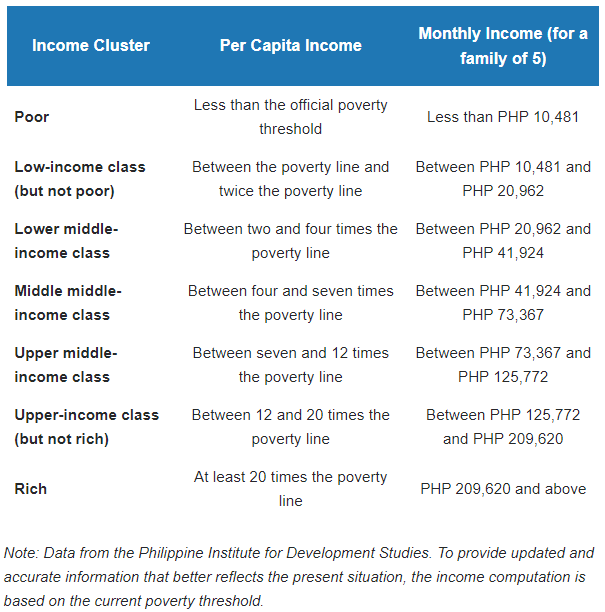


**Assigning X and Y Values**

In [3]:
target = 'total_household_income_monthly'
target_raw = 'total_household_income'

y = clean_data[target]
X = clean_data[clean_data.columns.difference([target,target_raw])]

In [4]:
X.head()

,agricultural_household_indicator,alcoholic_beverages_expenditure,bread_and_cereals_expenditure,"clothing,_footwear_and_other_wear_expenditure",communication_expenditure,crop_farming_and_gardening_expenses,education_expenditure,electricity,fruit_expenditure,house_age,...,total_income_from_entrepreneurial_acitivites,total_number_of_family_members,total_number_of_family_members_employed,total_rice_expenditure,transportation_expenditure,type_of_building/house,type_of_household,type_of_roof,type_of_walls,vegetables_expenditure
0,0,0,42140,4607,2880,19370,36200,1,3325,75,...,44370,4,1,38300,4776,5,0,6,4,13460
1,0,960,17329,8230,5700,0,29300,1,2035,15,...,0,3,2,13008,12900,5,1,6,4,7833
2,1,270,34182,2735,420,0,425,0,1730,12,...,0,6,3,32001,324,5,1,0,0,3795
3,0,480,34030,1390,660,15580,300,1,690,15,...,15580,3,2,28659,6840,5,1,0,0,7887
4,0,1040,34820,4620,2100,18887,0,1,1395,16,...,75687,4,2,30167,6996,5,1,0,2,11260


**Binning Data For Labelling Y Variable**

In [5]:
stats = clean_data['total_household_income_monthly'].describe()
# Getting the mean of total_household_income_monthly
mean = int(stats['mean'])
# Getting the median of all income ranges from the Yahoo News
median = int(np.median([0, 10481, 20962, 41924, 73367, 125772, 209620, 100000]))
# Getting the max income of total_household_income_monthly
max = int(stats['max'])
print("STATISTICS OF TOTAL HOUSEHOLD INCOME MONTHLY")
print(stats, "\n")
print("Mean:", mean)
print("Median:", median)
print("Max:", max)

STATISTICS OF TOTAL HOUSEHOLD INCOME MONTHLY
count     41544.000000
mean      20629.632067
std       23906.710221
min         940.416667
25%        8741.250000
50%       13673.291667
75%       24261.541667
max      984665.666667
Name: total_household_income_monthly, dtype: float64 

Mean: 20629
Median: 57645
Max: 984665


**Getting the range of income classes**

To get the range of income per class we need to look at the mean of the total_household_income_monthly, median of the income based on the Yahoo News and highest income in the data therefore:
  * Mean = 20,629
  * Median = 57,645   
  * Highest Income = 984,665

In [6]:
# Labelling total_house_income_monthly into 7 social classes
labels = ['low_income_class',
          'middle_income_class',
          'upper_income_class']
bins = [0, 20629, 57645, 984666]
y = pd.cut(y, bins, labels=labels)

**Scaling X variable using Standard Scaler**

In [7]:
cols = list(X.columns[X.dtypes != object])
std_scale = StandardScaler().fit(X[cols])
X[cols] = pd.DataFrame(std_scale.transform(X[cols]), columns=cols)

C:\Users\New User\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Splitting the data into train and test 
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [9]:
# Decision Tree Classifier training
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_leaf_nodes=None, random_state=0)
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

# Predicting test dataset
y_pred = dtc.predict(X_test)

0.8477554459020339


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Cross Validation 
scores = cross_val_score(dtc, X, y, cv=5)
print('\nDecision Tree Classifier: ' + 'cross_val_score: ' + str(np.mean(scores)))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# Precision: tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n", cm)

# Classification Report
print("\nClassification Report")
print(classification_report(y_test, y_pred))
